<h1>Finance in Python </h1>

In [49]:
#!pip install pandas_datareader
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [5]:
style.use('ggplot')

start_ = dt.datetime(2015, 1, 2)
end_ = dt.datetime( 2017 , 12, 31)

In [50]:
#!pip install yfinance
import yfinance as yf

In [52]:
tickerSymbol ='ACN'

#get data
tickerData = yf.Ticker(tickerSymbol)
tickerDF= tickerData.history(period='1d', start=start_,end=end_)
tickerDF.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,80.61,80.99,79.49,79.86,2021300,0.0,0
2015-01-05,79.14,79.39,78.37,78.51,3000000,0.0,0


In [6]:
#another DF
TSLAData = yf.Ticker('TSLA')

df = TSLAData.history(period='1d', start=start_,end=end_)
df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,222.87,223.25,213.26,219.31,4764400,0,0
2015-01-05,214.55,216.50,207.16,210.09,5368500,0,0
2015-01-06,210.06,214.20,204.21,211.28,6261900,0,0


In [7]:
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)


print(df.head())

              Open    High     Low   Close   Volume  Dividends  Stock Splits
Date                                                                        
2015-01-02  222.87  223.25  213.26  219.31  4764400          0             0
2015-01-05  214.55  216.50  207.16  210.09  5368500          0             0
2015-01-06  210.06  214.20  204.21  211.28  6261900          0             0
2015-01-07  213.35  214.78  209.78  210.95  2968400          0             0
2015-01-08  212.81  213.80  210.01  210.62  3442500          0             0


In [27]:
#dump to csv
df.to_csv('TSLA.csv')

In [39]:
df = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)

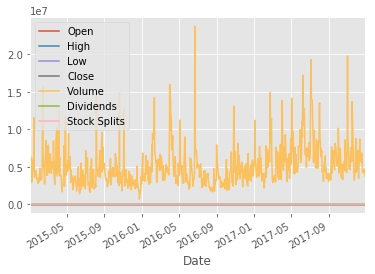

In [42]:
df.plot()
plt.show()

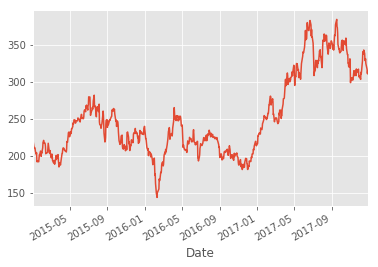

In [44]:
df['Close'].plot()

<h2>Manipulation + graph multi </h2>

In [6]:
df['100ma'] = df['Close'].rolling(window=100,min_periods=0).mean()
print(df.head())

              Open    High     Low   Close   Volume  Dividends  Stock Splits  \
Date                                                                           
2015-01-02  222.87  223.25  213.26  219.31  4764400          0             0   
2015-01-05  214.55  216.50  207.16  210.09  5368500          0             0   
2015-01-06  210.06  214.20  204.21  211.28  6261900          0             0   
2015-01-07  213.35  214.78  209.78  210.95  2968400          0             0   
2015-01-08  212.81  213.80  210.01  210.62  3442500          0             0   

               100ma  
Date                  
2015-01-02  219.3100  
2015-01-05  214.7000  
2015-01-06  213.5600  
2015-01-07  212.9075  
2015-01-08  212.4500  


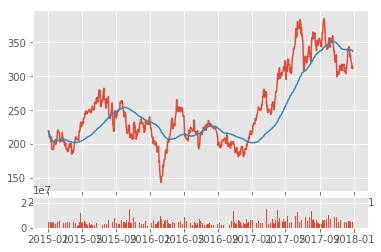

In [12]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

<h2>Manipulation and Candlestic , OHLC </h2>


In [16]:
#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [15]:
from mpl_finance import candlestick2_ohlc, volume_overlay
import matplotlib.dates as mdates

/home/dan/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [17]:
df_ohlc = df['Close'].resample('10D').ohlc()

In [18]:
df_volume = df['Volume'].resample('10D').sum()

In [19]:
print(df_ohlc.head())

              open    high     low   close
Date                                      
2015-01-02  219.31  219.31  206.66  206.66
2015-01-12  202.21  204.25  191.87  196.57
2015-01-22  201.62  206.55  199.37  203.60
2015-02-01  210.94  220.99  210.94  216.29
2015-02-11  212.80  217.11  202.88  217.11


In [20]:
#dates to mdates version
#create regular column
df_ohlc = df_ohlc.reset_index()

In [21]:
#convert
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

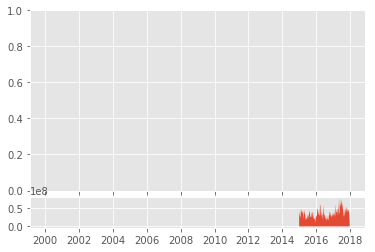

In [31]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

#candlestick2_ohlc(ax1, df_ohlc.values, width=2, colorup='g')

ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

candlestic needs parameters . .. to revisit


<h2>getting data and save . S&P companies </h2>

In [1]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import yfinance as yf
import os

In [2]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

#save_sp500_tickers()

In [4]:
def get_data(reload_sp500= False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start_ = dt.datetime(2015, 1, 2)
    end_ = dt.datetime(2017,3,31)
    
    for ticker in tickers[0:10]:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            tickerSymbol= str(ticker)
            tickerData = yf.Ticker(tickerSymbol)
            df = tickerData.history(period='1d', start=start_,end=end_)
            print(tickerSymbol)
            #df.reset_index(inplace=True)
            #df.set_index("Date", inplace=True)
         #   df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            print(type(ticker))

get_data()


- MMM
: No data found, symbol may be delisted
MMM

- ABT
: No data found, symbol may be delisted
ABT

- ABBV
: No data found, symbol may be delisted
ABBV

- ABMD
: No data found, symbol may be delisted
ABMD

- ACN
: No data found, symbol may be delisted
ACN

- ATVI
: No data found, symbol may be delisted
ATVI

- ADBE
: No data found, symbol may be delisted
ADBE

- AMD
: No data found, symbol may be delisted
AMD

- AAP
: No data found, symbol may be delisted
AAP

- AES
: No data found, symbol may be delisted
AES



In [8]:
start_ = dt.datetime(2015, 1, 2)
end_ = dt.datetime(2017,3,31)
ticker = 'MMM'
tickerData =yf.Ticker(ticker)
df = tickerData.history(period='1d', start=start_,end=end_)
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,142.62,142.94,140.91,142.06,2116400,0.000,0
2015-01-05,141.14,141.70,138.61,138.86,3692900,0.000,0
2015-01-06,139.26,139.73,136.59,137.38,3532000,0.000,0
2015-01-07,138.46,138.79,137.63,138.37,3081300,0.000,0
2015-01-08,139.11,141.74,139.00,141.69,3142900,0.000,0
2015-01-09,141.88,142.01,139.65,139.95,2378600,0.000,0
2015-01-12,140.62,140.62,138.56,139.19,2149200,0.000,0
2015-01-13,140.48,142.34,138.07,139.08,2703000,0.000,0
2015-01-14,137.71,139.00,137.25,138.41,1983500,0.000,0


In [59]:
s='sdfdf'
type(s)

str